# Model creation

## Libs

In [1]:
from prepareRSSI import RssiDatas
import pandas as pd
import parameters as param
import numpy as np
import tensorflow as tf
#import intel-tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K # to set the learning rate

## Import the RSSI, mac and zones values

In [2]:
RSSI = RssiDatas()

rssi_tmp = np.genfromtxt(param.rssi_csv_output, delimiter=',')
# deleting index column and row :
rssi_tmp = np.delete(rssi_tmp, 0, 1)
RSSI.rssi = np.delete(rssi_tmp, 0, 0)

mac_tmp = np.genfromtxt(param.mac_csv_output, delimiter=',', dtype=str)
# deleting index column and row :
mac_tmp = mac_tmp[:,1] # keep only the column with the mac adresses
RSSI.mac = np.delete(mac_tmp, 0) # delete the first row because empty

zones_tmp = np.genfromtxt(param.zones_csv_output, delimiter=',')
# deleting index column and row :
zones_tmp = zones_tmp[:,1] # keep only the colomn with the zone ids
RSSI.zones = np.delete(zones_tmp, 0, 0) # delete the first row because empty

## Pre load datas into model

In [3]:
print("RSSI.rssi : ", np.shape(RSSI.rssi))
print("RSSI.zones : ", np.shape(RSSI.zones))
zonesNb = 7 # number of zones

# create the zone output array of vectors :
y_zones = np.zeros([np.size(RSSI.zones), zonesNb])
for i in range(np.size(RSSI.zones)):
    y_zones[i, int(RSSI.zones[i])] = 1

train_data, test_data, train_labels, test_labels = train_test_split(RSSI.rssi,y_zones)
print("train_data : ", np.shape(train_data))
print("train_labels : ", np.shape(train_labels))
print("test_data : ", np.shape(test_data))
print("test_labels : ", np.shape(test_labels))
# normalize the RSSI values from 0 to 1
train_data = train_data/(-95)
test_data = test_data/(-95)

RSSI.rssi :  (265, 128)
RSSI.zones :  (265,)
train_data :  (198, 128)
train_labels :  (198, 7)
test_data :  (67, 128)
test_labels :  (67, 7)


## Create the model

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dropout(param.dropout),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dropout(param.dropout),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dropout(param.dropout),
  tf.keras.layers.Dense(7)
])

## Compile the model

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, param.learningRate)

## Train the model

In [6]:
history = model.fit(train_data, train_labels,
                    epochs=param.epochs,
                    validation_data=(test_data, test_labels))

Epoch 1/5000
7/7 [==============================] - 0s 17ms/step - loss: 0.3334 - accuracy: 0.1818 - val_loss: 0.2560 - val_accuracy: 0.2090
Epoch 2/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.2385 - accuracy: 0.1818 - val_loss: 0.1895 - val_accuracy: 0.2090
Epoch 3/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.1818 - val_loss: 0.1521 - val_accuracy: 0.1791
Epoch 4/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1453 - accuracy: 0.1364 - val_loss: 0.1351 - val_accuracy: 0.1194
Epoch 5/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1297 - accuracy: 0.2172 - val_loss: 0.1276 - val_accuracy: 0.1493
Epoch 6/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1227 - accuracy: 0.2424 - val_loss: 0.1238 - val_accuracy: 0.2239
Epoch 7/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1199 - accuracy: 0.2879 - val_loss: 0.1227 - val_accuracy: 0.2388
Epoch 8/5000
7/7 [=

7/7 [==============================] - 0s 3ms/step - loss: 0.1059 - accuracy: 0.4848 - val_loss: 0.1072 - val_accuracy: 0.4776
Epoch 60/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.4697 - val_loss: 0.1076 - val_accuracy: 0.4627
Epoch 61/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1054 - accuracy: 0.4343 - val_loss: 0.1077 - val_accuracy: 0.4925
Epoch 62/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1051 - accuracy: 0.4293 - val_loss: 0.1070 - val_accuracy: 0.4627
Epoch 63/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1051 - accuracy: 0.4697 - val_loss: 0.1066 - val_accuracy: 0.4776
Epoch 64/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 0.5051 - val_loss: 0.1063 - val_accuracy: 0.5075
Epoch 65/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1043 - accuracy: 0.5253 - val_loss: 0.1061 - val_accuracy: 0.4776
Epoch 66/5000
7/7 [========

7/7 [==============================] - 0s 3ms/step - loss: 0.0902 - accuracy: 0.6970 - val_loss: 0.0927 - val_accuracy: 0.6567
Epoch 118/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.8182 - val_loss: 0.0924 - val_accuracy: 0.7015
Epoch 119/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0898 - accuracy: 0.7475 - val_loss: 0.0921 - val_accuracy: 0.5672
Epoch 120/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0898 - accuracy: 0.6162 - val_loss: 0.0921 - val_accuracy: 0.5970
Epoch 121/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0896 - accuracy: 0.6364 - val_loss: 0.0919 - val_accuracy: 0.6269
Epoch 122/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0891 - accuracy: 0.7273 - val_loss: 0.0903 - val_accuracy: 0.7164
Epoch 123/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0887 - accuracy: 0.7424 - val_loss: 0.0906 - val_accuracy: 0.6716
Epoch 124/5000
7/7 [=

Epoch 175/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0781 - accuracy: 0.8586 - val_loss: 0.0811 - val_accuracy: 0.7612
Epoch 176/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.8182 - val_loss: 0.0813 - val_accuracy: 0.6866
Epoch 177/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.7929 - val_loss: 0.0800 - val_accuracy: 0.7612
Epoch 178/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0770 - accuracy: 0.8737 - val_loss: 0.0792 - val_accuracy: 0.8060
Epoch 179/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0769 - accuracy: 0.8687 - val_loss: 0.0793 - val_accuracy: 0.7612
Epoch 180/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.8283 - val_loss: 0.0794 - val_accuracy: 0.7463
Epoch 181/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.8384 - val_loss: 0.0791 - val_accuracy: 0.7761
Epoch 

Epoch 233/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.8636 - val_loss: 0.0701 - val_accuracy: 0.8358
Epoch 234/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0683 - accuracy: 0.8434 - val_loss: 0.0709 - val_accuracy: 0.7761
Epoch 235/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.8687 - val_loss: 0.0704 - val_accuracy: 0.8358
Epoch 236/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0679 - accuracy: 0.8838 - val_loss: 0.0708 - val_accuracy: 0.7761
Epoch 237/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.8333 - val_loss: 0.0701 - val_accuracy: 0.7612
Epoch 238/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0674 - accuracy: 0.8333 - val_loss: 0.0705 - val_accuracy: 0.7910
Epoch 239/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0675 - accuracy: 0.8737 - val_loss: 0.0702 - val_accuracy: 0.7761
Epoch 

Epoch 291/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.8687 - val_loss: 0.0640 - val_accuracy: 0.7910
Epoch 292/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.8485 - val_loss: 0.0652 - val_accuracy: 0.8060
Epoch 293/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.8788 - val_loss: 0.0641 - val_accuracy: 0.8060
Epoch 294/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.8535 - val_loss: 0.0648 - val_accuracy: 0.8060
Epoch 295/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.8788 - val_loss: 0.0644 - val_accuracy: 0.8657
Epoch 296/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0605 - accuracy: 0.8687 - val_loss: 0.0641 - val_accuracy: 0.7910
Epoch 297/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.8687 - val_loss: 0.0642 - val_accuracy: 0.8358
Epoch 

Epoch 349/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.8939 - val_loss: 0.0602 - val_accuracy: 0.8209
Epoch 350/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.8636 - val_loss: 0.0605 - val_accuracy: 0.7761
Epoch 351/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.8990 - val_loss: 0.0605 - val_accuracy: 0.8209
Epoch 352/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.8990 - val_loss: 0.0609 - val_accuracy: 0.7910
Epoch 353/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0555 - accuracy: 0.8384 - val_loss: 0.0596 - val_accuracy: 0.7910
Epoch 354/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.8889 - val_loss: 0.0584 - val_accuracy: 0.8209
Epoch 355/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.8838 - val_loss: 0.0587 - val_accuracy: 0.8060
Epoch 

Epoch 407/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9293 - val_loss: 0.0543 - val_accuracy: 0.8657
Epoch 408/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9192 - val_loss: 0.0532 - val_accuracy: 0.8806
Epoch 409/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9394 - val_loss: 0.0547 - val_accuracy: 0.8955
Epoch 410/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9394 - val_loss: 0.0545 - val_accuracy: 0.8657
Epoch 411/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9495 - val_loss: 0.0543 - val_accuracy: 0.8657
Epoch 412/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9192 - val_loss: 0.0546 - val_accuracy: 0.8507
Epoch 413/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9192 - val_loss: 0.0558 - val_accuracy: 0.8358
Epoch 

Epoch 465/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.9545 - val_loss: 0.0515 - val_accuracy: 0.8955
Epoch 466/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9646 - val_loss: 0.0504 - val_accuracy: 0.8657
Epoch 467/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9596 - val_loss: 0.0506 - val_accuracy: 0.8806
Epoch 468/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9495 - val_loss: 0.0505 - val_accuracy: 0.8806
Epoch 469/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9596 - val_loss: 0.0519 - val_accuracy: 0.8507
Epoch 470/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9646 - val_loss: 0.0495 - val_accuracy: 0.8806
Epoch 471/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9545 - val_loss: 0.0507 - val_accuracy: 0.8806
Epoch 

Epoch 523/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9697 - val_loss: 0.0472 - val_accuracy: 0.8955
Epoch 524/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9747 - val_loss: 0.0473 - val_accuracy: 0.8955
Epoch 525/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9596 - val_loss: 0.0475 - val_accuracy: 0.9104
Epoch 526/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9747 - val_loss: 0.0471 - val_accuracy: 0.8657
Epoch 527/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9697 - val_loss: 0.0468 - val_accuracy: 0.8955
Epoch 528/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9545 - val_loss: 0.0461 - val_accuracy: 0.9104
Epoch 529/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9747 - val_loss: 0.0467 - val_accuracy: 0.8955
Epoch 

Epoch 581/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9747 - val_loss: 0.0437 - val_accuracy: 0.9104
Epoch 582/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9747 - val_loss: 0.0422 - val_accuracy: 0.9104
Epoch 583/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9747 - val_loss: 0.0426 - val_accuracy: 0.9104
Epoch 584/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9747 - val_loss: 0.0424 - val_accuracy: 0.9104
Epoch 585/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9747 - val_loss: 0.0425 - val_accuracy: 0.9104
Epoch 586/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9747 - val_loss: 0.0432 - val_accuracy: 0.9104
Epoch 587/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9747 - val_loss: 0.0440 - val_accuracy: 0.9104
Epoch 

Epoch 639/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9747 - val_loss: 0.0396 - val_accuracy: 0.9254
Epoch 640/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9747 - val_loss: 0.0396 - val_accuracy: 0.9254
Epoch 641/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9747 - val_loss: 0.0399 - val_accuracy: 0.9254
Epoch 642/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9747 - val_loss: 0.0388 - val_accuracy: 0.9104
Epoch 643/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9747 - val_loss: 0.0405 - val_accuracy: 0.9254
Epoch 644/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9747 - val_loss: 0.0389 - val_accuracy: 0.9254
Epoch 645/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9747 - val_loss: 0.0398 - val_accuracy: 0.9104
Epoch 

Epoch 697/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9747 - val_loss: 0.0365 - val_accuracy: 0.9254
Epoch 698/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9747 - val_loss: 0.0371 - val_accuracy: 0.9104
Epoch 699/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9747 - val_loss: 0.0370 - val_accuracy: 0.9104
Epoch 700/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9747 - val_loss: 0.0363 - val_accuracy: 0.9254
Epoch 701/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9747 - val_loss: 0.0368 - val_accuracy: 0.9254
Epoch 702/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9747 - val_loss: 0.0362 - val_accuracy: 0.9254
Epoch 703/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9747 - val_loss: 0.0367 - val_accuracy: 0.9254
Epoch 

Epoch 755/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9798 - val_loss: 0.0335 - val_accuracy: 0.9254
Epoch 756/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9747 - val_loss: 0.0338 - val_accuracy: 0.9254
Epoch 757/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9747 - val_loss: 0.0337 - val_accuracy: 0.9254
Epoch 758/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9747 - val_loss: 0.0342 - val_accuracy: 0.9254
Epoch 759/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9747 - val_loss: 0.0334 - val_accuracy: 0.9254
Epoch 760/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9747 - val_loss: 0.0325 - val_accuracy: 0.9254
Epoch 761/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9747 - val_loss: 0.0347 - val_accuracy: 0.9254
Epoch 

Epoch 813/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9798 - val_loss: 0.0326 - val_accuracy: 0.9254
Epoch 814/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9798 - val_loss: 0.0311 - val_accuracy: 0.9403
Epoch 815/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9848 - val_loss: 0.0313 - val_accuracy: 0.9254
Epoch 816/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9798 - val_loss: 0.0318 - val_accuracy: 0.9254
Epoch 817/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9747 - val_loss: 0.0314 - val_accuracy: 0.9254
Epoch 818/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9747 - val_loss: 0.0314 - val_accuracy: 0.9254
Epoch 819/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9798 - val_loss: 0.0316 - val_accuracy: 0.9254
Epoch 

Epoch 871/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9848 - val_loss: 0.0304 - val_accuracy: 0.9403
Epoch 872/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9747 - val_loss: 0.0285 - val_accuracy: 0.9403
Epoch 873/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9798 - val_loss: 0.0290 - val_accuracy: 0.9403
Epoch 874/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9798 - val_loss: 0.0305 - val_accuracy: 0.9254
Epoch 875/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9798 - val_loss: 0.0283 - val_accuracy: 0.9403
Epoch 876/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9747 - val_loss: 0.0305 - val_accuracy: 0.9254
Epoch 877/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9798 - val_loss: 0.0291 - val_accuracy: 0.9254
Epoch 

Epoch 929/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9848 - val_loss: 0.0266 - val_accuracy: 0.9552
Epoch 930/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9899 - val_loss: 0.0277 - val_accuracy: 0.9403
Epoch 931/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9899 - val_loss: 0.0273 - val_accuracy: 0.9552
Epoch 932/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9899 - val_loss: 0.0279 - val_accuracy: 0.9254
Epoch 933/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9798 - val_loss: 0.0278 - val_accuracy: 0.9254
Epoch 934/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9899 - val_loss: 0.0271 - val_accuracy: 0.9552
Epoch 935/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0189 - accuracy: 0.9899 - val_loss: 0.0278 - val_accuracy: 0.9403
Epoch 

Epoch 987/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9899 - val_loss: 0.0264 - val_accuracy: 0.9552
Epoch 988/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9899 - val_loss: 0.0251 - val_accuracy: 0.9701
Epoch 989/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9899 - val_loss: 0.0254 - val_accuracy: 0.9552
Epoch 990/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9899 - val_loss: 0.0258 - val_accuracy: 0.9552
Epoch 991/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9899 - val_loss: 0.0254 - val_accuracy: 0.9552
Epoch 992/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9899 - val_loss: 0.0256 - val_accuracy: 0.9552
Epoch 993/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0169 - accuracy: 0.9899 - val_loss: 0.0260 - val_accuracy: 0.9403
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9899 - val_loss: 0.0238 - val_accuracy: 0.9552
Epoch 1045/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9899 - val_loss: 0.0240 - val_accuracy: 0.9552
Epoch 1046/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0246 - val_accuracy: 0.9552
Epoch 1047/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9899 - val_loss: 0.0239 - val_accuracy: 0.9552
Epoch 1048/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9899 - val_loss: 0.0245 - val_accuracy: 0.9552
Epoch 1049/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9899 - val_loss: 0.0240 - val_accuracy: 0.9552
Epoch 1050/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9899 - val_loss: 0.0239 - val_accuracy: 0.9552
Epoch 1051/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 0.9552
Epoch 1102/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9949 - val_loss: 0.0230 - val_accuracy: 0.9552
Epoch 1103/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9899 - val_loss: 0.0228 - val_accuracy: 0.9552
Epoch 1104/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9949 - val_loss: 0.0221 - val_accuracy: 0.9552
Epoch 1105/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0141 - accuracy: 0.9899 - val_loss: 0.0223 - val_accuracy: 0.9552
Epoch 1106/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9949 - val_loss: 0.0223 - val_accuracy: 0.9552
Epoch 1107/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9899 - val_loss: 0.0221 - val_accuracy: 0.9552
Epoch 1108/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9949 - val_loss: 0.0217 - val_accuracy: 0.9701
Epoch 1159/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9899 - val_loss: 0.0214 - val_accuracy: 0.9701
Epoch 1160/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9949 - val_loss: 0.0218 - val_accuracy: 0.9552
Epoch 1161/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9949 - val_loss: 0.0207 - val_accuracy: 0.9701
Epoch 1162/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy: 0.9552
Epoch 1163/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9949 - val_loss: 0.0216 - val_accuracy: 0.9552
Epoch 1164/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9949 - val_loss: 0.0211 - val_accuracy: 0.9701
Epoch 1165/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy: 0.9701
Epoch 1216/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9949 - val_loss: 0.0204 - val_accuracy: 0.9552
Epoch 1217/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9949 - val_loss: 0.0199 - val_accuracy: 0.9552
Epoch 1218/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9949 - val_loss: 0.0202 - val_accuracy: 0.9701
Epoch 1219/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9949 - val_loss: 0.0201 - val_accuracy: 0.9701
Epoch 1220/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9949 - val_loss: 0.0202 - val_accuracy: 0.9552
Epoch 1221/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9949 - val_loss: 0.0204 - val_accuracy: 0.9701
Epoch 1222/5000

7/7 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 0.9949 - val_loss: 0.0189 - val_accuracy: 0.9701
Epoch 1273/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9949 - val_loss: 0.0196 - val_accuracy: 0.9552
Epoch 1274/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9949 - val_loss: 0.0189 - val_accuracy: 0.9701
Epoch 1275/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 0.9701
Epoch 1276/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9949 - val_loss: 0.0191 - val_accuracy: 0.9701
Epoch 1277/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9949 - val_loss: 0.0192 - val_accuracy: 0.9552
Epoch 1278/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0196 - val_accuracy: 0.9701
Epoch 1279/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9899 - val_loss: 0.0187 - val_accuracy: 0.9701
Epoch 1330/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 0.9851
Epoch 1331/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 0.9701
Epoch 1332/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9949 - val_loss: 0.0183 - val_accuracy: 0.9552
Epoch 1333/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9701
Epoch 1334/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9949 - val_loss: 0.0179 - val_accuracy: 0.9701
Epoch 1335/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 0.9701
Epoch 1336/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 0.9851
Epoch 1387/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0179 - val_accuracy: 0.9552
Epoch 1388/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 0.9701
Epoch 1389/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0181 - val_accuracy: 0.9552
Epoch 1390/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9949 - val_loss: 0.0172 - val_accuracy: 0.9701
Epoch 1391/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9949 - val_loss: 0.0183 - val_accuracy: 0.9701
Epoch 1392/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0170 - val_accuracy: 0.9701
Epoch 1393/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 0.9701
Epoch 1444/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 0.9701
Epoch 1445/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0167 - val_accuracy: 0.9701
Epoch 1446/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 0.9701
Epoch 1447/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9949 - val_loss: 0.0173 - val_accuracy: 0.9851
Epoch 1448/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 0.9701
Epoch 1449/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9949 - val_loss: 0.0168 - val_accuracy: 0.9851
Epoch 1450/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9949 - val_loss: 0.0167 - val_accuracy: 0.9851
Epoch 1501/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 0.9701
Epoch 1502/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9949 - val_loss: 0.0163 - val_accuracy: 0.9701
Epoch 1503/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0167 - val_accuracy: 0.9701
Epoch 1504/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 0.9701
Epoch 1505/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0166 - val_accuracy: 0.9701
Epoch 1506/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0161 - val_accuracy: 0.9701
Epoch 1507/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 0.9701
Epoch 1558/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 0.9851
Epoch 1559/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 0.9701
Epoch 1560/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 0.9701
Epoch 1561/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 0.9851
Epoch 1562/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 0.9701
Epoch 1563/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 0.9851
Epoch 1564/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 0.9701
Epoch 1615/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 0.9701
Epoch 1616/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 0.9701
Epoch 1617/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 0.9701
Epoch 1618/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 0.9701
Epoch 1619/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 0.9851
Epoch 1620/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 0.9701
Epoch 1621/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 0.9851
Epoch 1672/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 0.9701
Epoch 1673/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 0.9851
Epoch 1674/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 0.9701
Epoch 1675/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 0.9851
Epoch 1676/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 0.9701
Epoch 1677/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy: 0.9701
Epoch 1678/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 0.9851
Epoch 1729/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 0.9851
Epoch 1730/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 0.9701
Epoch 1731/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9851
Epoch 1732/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 0.9701
Epoch 1733/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 0.9851
Epoch 1734/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 0.9851
Epoch 1735/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 0.9701
Epoch 1786/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 0.9851
Epoch 1787/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 0.9851
Epoch 1788/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 0.9851
Epoch 1789/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9851
Epoch 1790/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 0.9851
Epoch 1791/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 0.9851
Epoch 1792/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 1843/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 0.9851
Epoch 1844/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 0.9851
Epoch 1845/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 0.9851
Epoch 1846/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9851
Epoch 1847/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 0.9851
Epoch 1848/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9851
Epoch 1849/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 1900/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 0.9851
Epoch 1901/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 0.9851
Epoch 1902/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 1903/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 0.9851
Epoch 1904/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 0.9851
Epoch 1905/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9851
Epoch 1906/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 0.9851
Epoch 1957/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9851
Epoch 1958/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9851
Epoch 1959/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 0.9851
Epoch 1960/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 1961/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 0.9851
Epoch 1962/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 1963/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 2014/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 2015/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 0.9851
Epoch 2016/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 2017/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 0.9851
Epoch 2018/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 0.9851
Epoch 2019/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 2020/5000

7/7 [==============================] - 0s 4ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 2071/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 2072/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 2073/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 2074/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9851
Epoch 2075/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 2076/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9851
Epoch 2077/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9851
Epoch 2128/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 2129/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 2130/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 2131/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 2132/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 0.9851
Epoch 2133/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 2134/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 2185/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 2186/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 2187/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 2188/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 2189/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 2190/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 2191/5000

7/7 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 2242/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 2243/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 2244/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 2245/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 2246/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 2247/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 2248/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 2299/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 2300/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 2301/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 2302/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 2303/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 2304/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 2305/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 2356/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 2357/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 2358/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 2359/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 2360/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 2361/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 2362/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 2413/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 2414/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 2415/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 2416/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 2417/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 2418/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 2419/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 2470/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 2471/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 2472/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 2473/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 2474/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 2475/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 2476/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 2527/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 2528/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 2529/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 2530/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 2531/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 2532/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 2533/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 2584/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 2585/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 2586/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 2587/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 2588/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 2589/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 2590/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 2641/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 2642/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 2643/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 2644/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 2645/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 2646/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 2647/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 2698/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 2699/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 2700/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 2701/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 2702/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 2703/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 2704/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 2755/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 2756/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 2757/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 2758/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 2759/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 2760/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 2761/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 2812/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 2813/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 2814/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 2815/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 2816/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 2817/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 2818/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 2869/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 2870/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 2871/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 2872/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 2873/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 2874/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 2875/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 2926/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 2927/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 2928/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 2929/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 2930/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 2931/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 2932/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 2983/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 2984/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 2985/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 2986/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 2987/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 2988/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 2989/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 3040/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 3041/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 3042/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 3043/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 3044/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 3045/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 3046/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 3097/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 3098/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 3099/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 3100/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 3101/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 3102/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 3103/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 3154/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 3155/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 3156/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 3157/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 3158/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 3159/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 3160/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 3211/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 3212/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 3213/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 3214/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 3215/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 3216/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 3217/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 3268/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 3269/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 3270/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 3271/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 3272/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 3273/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 3274/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 3325/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 3326/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 3327/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 3328/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 3329/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 3330/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 3331/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 3382/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 3383/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 3384/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 3385/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 3386/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 3387/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 3388/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 3439/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 3440/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 3441/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 3442/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 3443/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 3444/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 3445/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 3496/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 3497/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 3498/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 3499/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 3500/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 3501/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 3502/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 3553/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 3554/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 3555/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 3556/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 3557/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 3558/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 3559/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 3610/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 3611/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 3612/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 3613/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 3614/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 3615/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 3616/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 3667/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 3668/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 3669/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 3670/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 3671/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 3672/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 3673/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 3724/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 3725/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 3726/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 3727/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 3728/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 3729/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 3730/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 3781/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 3782/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 3783/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 3784/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 3785/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 3786/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 3787/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 3838/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 3839/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 3840/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 3841/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 3842/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 3843/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 3844/5000

7/7 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 3895/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 3896/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 3897/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 3898/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 3899/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 3900/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 3901/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 3952/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 3953/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 3954/5000
7/7 [==============================] - 0s 3ms/step - loss: 9.9813e-04 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 3955/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 3956/5000
7/7 [==============================] - 0s 3ms/step - loss: 9.9006e-04 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 3957/5000
7/7 [==============================] - 0s 3ms/step - loss: 9.8478e-04 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epo

Epoch 4008/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 4009/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 4010/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 4011/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 4012/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 4013/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 4014/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000

7/7 [==============================] - 0s 3ms/step - loss: 8.8602e-04 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4065/5000
7/7 [==============================] - 0s 3ms/step - loss: 9.8115e-04 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 4066/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 4067/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 4068/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 4069/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 4070/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4

7/7 [==============================] - 0s 4ms/step - loss: 9.3392e-04 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 4121/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.7801e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4122/5000
7/7 [==============================] - 0s 3ms/step - loss: 9.0345e-04 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4123/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.8024e-04 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4124/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.6742e-04 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 4125/5000
7/7 [==============================] - 0s 3ms/step - loss: 9.1123e-04 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4126/5000
7/7 [==============================] - 0s 3ms/step - loss: 9.1027e-04 - accuracy: 1.0000 - val_loss: 0.0047 - val_accu

Epoch 4176/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.6882e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4177/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.8125e-04 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4178/5000
7/7 [==============================] - 0s 3ms/step - loss: 9.2537e-04 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 4179/5000
7/7 [==============================] - 0s 3ms/step - loss: 9.3611e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4180/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.7679e-04 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 4181/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.9065e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4182/5000
7/7 [==============================] - 0s 3ms/step - loss: 9.8030e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 4232/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.4452e-04 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 4233/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.4494e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 4234/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.0708e-04 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 4235/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.3368e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 4236/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.0020e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 4237/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.7778e-04 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4238/5000
7/7 [==============================] - 0s 4ms/step - loss: 8.7469e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 4288/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.3216e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4289/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.2152e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4290/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.3392e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4291/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.9136e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 4292/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.7984e-04 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 4293/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.2931e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 4294/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.1891e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 4344/5000
7/7 [==============================] - 0s 4ms/step - loss: 8.7264e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 4345/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.9694e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 4346/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.0898e-04 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4347/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.2998e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 4348/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.2987e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4349/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.4774e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 4350/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.5262e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 4400/5000
7/7 [==============================] - 0s 4ms/step - loss: 7.6278e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 4401/5000
7/7 [==============================] - 0s 4ms/step - loss: 7.6300e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4402/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.8578e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4403/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.6836e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 4404/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.7333e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4405/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.7527e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4406/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.4833e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 4456/5000
7/7 [==============================] - 0s 4ms/step - loss: 7.4726e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 4457/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.6059e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4458/5000
7/7 [==============================] - 0s 4ms/step - loss: 7.4473e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4459/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.4186e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 4460/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.6197e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4461/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.9008e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4462/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.1937e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 4512/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.5879e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 4513/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.2708e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 4514/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.9280e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4515/5000
7/7 [==============================] - 0s 4ms/step - loss: 7.7030e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4516/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.9330e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 4517/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.6022e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 4518/5000
7/7 [==============================] - 0s 4ms/step - loss: 8.7623e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 4568/5000
7/7 [==============================] - 0s 4ms/step - loss: 7.3760e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 4569/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.8490e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 4570/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.3000e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4571/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.7333e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4572/5000
7/7 [==============================] - 0s 3ms/step - loss: 8.4500e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 4573/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.8132e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 4574/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.7613e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 4624/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.4668e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 4625/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.9440e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4626/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.7163e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4627/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.3423e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 4628/5000
7/7 [==============================] - 0s 4ms/step - loss: 6.2091e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 4629/5000
7/7 [==============================] - 0s 4ms/step - loss: 6.3612e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 4630/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.5148e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 4680/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.3588e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 4681/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.5594e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 4682/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.3372e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4683/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.5989e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 4684/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.5645e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 4685/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.4487e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4686/5000
7/7 [==============================] - 0s 4ms/step - loss: 6.3455e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 4736/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.9991e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 4737/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.4845e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 4738/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.5458e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4739/5000
7/7 [==============================] - 0s 3ms/step - loss: 9.4362e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 4740/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.8406e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 4741/5000
7/7 [==============================] - 0s 3ms/step - loss: 7.2877e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4742/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.4447e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 4792/5000
7/7 [==============================] - 0s 3ms/step - loss: 5.6143e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4793/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.1278e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4794/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.0939e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4795/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.1118e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4796/5000
7/7 [==============================] - 0s 3ms/step - loss: 5.9086e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 4797/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.3052e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 4798/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.5414e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 4848/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.4081e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4849/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.1604e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 4850/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.3887e-04 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 4851/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.1085e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4852/5000
7/7 [==============================] - 0s 3ms/step - loss: 5.7260e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4853/5000
7/7 [==============================] - 0s 3ms/step - loss: 5.8756e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 4854/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.2742e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 4904/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.2522e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4905/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.0570e-04 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 4906/5000
7/7 [==============================] - 0s 3ms/step - loss: 5.3594e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 4907/5000
7/7 [==============================] - 0s 3ms/step - loss: 5.7710e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4908/5000
7/7 [==============================] - 0s 3ms/step - loss: 5.4801e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4909/5000
7/7 [==============================] - 0s 3ms/step - loss: 5.3911e-04 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 4910/5000
7/7 [==============================] - 0s 3ms/step - loss: 5.4222e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 4960/5000
7/7 [==============================] - 0s 3ms/step - loss: 5.2759e-04 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 4961/5000
7/7 [==============================] - 0s 3ms/step - loss: 5.6410e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 4962/5000
7/7 [==============================] - 0s 3ms/step - loss: 5.7625e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 4963/5000
7/7 [==============================] - 0s 3ms/step - loss: 5.7394e-04 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 4964/5000
7/7 [==============================] - 0s 3ms/step - loss: 5.8927e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4965/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.0883e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4966/5000
7/7 [==============================] - 0s 3ms/step - loss: 6.1953e-04 - accuracy: 1.0000 - val_loss: 0

## Ploting learning datas

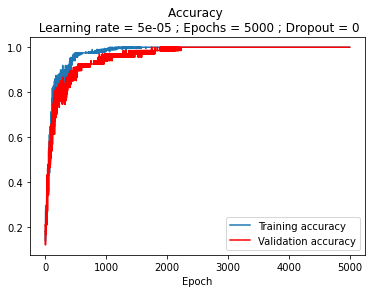

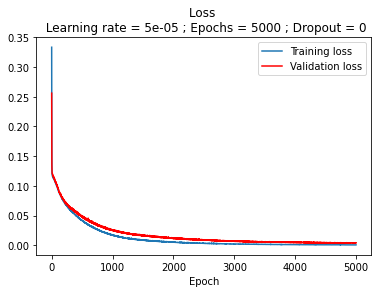

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(1)
plt.plot(acc, label="Training accuracy")
plt.plot(val_acc,color="red", label="Validation accuracy")
plt.legend(loc="lower right")
plt.title("Accuracy \n Learning rate = " + str(param.learningRate) + " ; Epochs = " + str(param.epochs) + " ; Dropout = " + str(param.dropout))
plt.xlabel("Epoch")
name = param.plot_saving_location + "plot_accuracy_lr_" + str(param.learningRate) + "_ep_" + str(param.epochs) + "_dr_" + str(param.dropout) + ".pdf"
name = name.replace(".", ",", 2) # replace the two first dots
plt.savefig(name, format="pdf")

plt.figure(2)
plt.plot(loss, label="Training loss")
plt.plot(val_loss,color="red", label="Validation loss")
plt.legend(loc="upper right")
plt.title("Loss \n Learning rate = " + str(param.learningRate) + " ; Epochs = " + str(param.epochs) + " ; Dropout = " + str(param.dropout))
plt.xlabel("Epoch")
name = param.plot_saving_location + "plot_loss_lr_" + str(param.learningRate) + "_ep_" + str(param.epochs) + "_dr_" + str(param.dropout) + ".pdf"
name = name.replace(".", ",", 2)
plt.savefig(name, format="pdf")

